# Clipping Streets and Exporting as a GeoJSON

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona
from fiona.crs import from_epsg

In [2]:
url = 'https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=GeoJSON'
boros = gpd.read_file(url)

boros = boros.to_crs(epsg=2263)
boros.head()

,boro_code,boro_name,shape_area,shape_leng,geometry
0,1,Manhattan,636603803.361,361611.82395,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
1,2,Bronx,1187244527.17,464650.051822,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
2,3,Brooklyn,1934091246.43,729592.941749,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,4,Queens,3044042300.55,900087.667215,"MULTIPOLYGON (((1032452.015 154469.237, 103245..."
4,5,Staten Island,1623757282.78,325956.009,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


<AxesSubplot:>

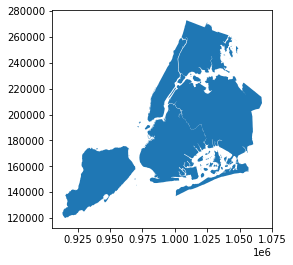

In [3]:
boros.plot()

In [4]:
url = 'https://data.cityofnewyork.us/api/geospatial/exjm-f27b?method=export&format=GeoJSON'
streets = gpd.read_file(url)

streets = streets.to_crs(epsg=2263)
streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry
0,6,None,None,0,10458,None,None,TRL,0,None,...,None,2,NV,None,MITSUBISHI WILD WETLAND TRL,164809,MITSUBISHI WILD WETLAND,2014-08-19T00:00:00,None,"MULTILINESTRING ((1017825.856 253319.853, 1017..."
1,1,215-001,None,35,11360,215-000,None,AVE,112262650,None,...,S,4,TW,None,28 AVE,6110,28,2007-11-29T00:00:00,215-027,"MULTILINESTRING ((1047146.080 222733.432, 1047..."
2,1,5631,None,42,10471,5602,None,AVE,1522601877,None,...,H,2,TW,None,ARLINGTON AVE,61140,ARLINGTON,2007-11-29T00:00:00,5699,"MULTILINESTRING ((1009926.638 269075.549, 1010..."
3,1,317,None,50,11217,316,2,ST,1922612977,TW,...,C,3,TW,None,SCHERMERHORN ST,145494,SCHERMERHORN,2007-11-29T00:00:00,399,"MULTILINESTRING ((989292.818 189689.736, 98964..."
4,1,120-011,None,40,11415,0,None,BLVD,92269521,None,...,C,4,TF,None,QUEENS BLVD,12438,QUEENS,2007-11-29T00:00:00,120-011,"MULTILINESTRING ((1031371.427 199453.863, 1031..."


In [5]:
streets.shape

(120037, 32)

<AxesSubplot:>

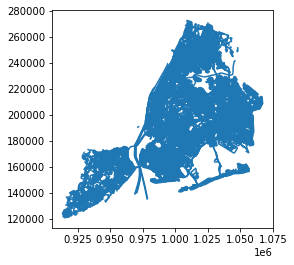

In [6]:
streets.plot()

In [7]:
streets.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 120037 entries, 0 to 120036
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   rw_type     120037 non-null  object  
 1   l_low_hn    84251 non-null   object  
 2   pre_direct  9774 non-null    object  
 3   st_width    120037 non-null  object  
 4   r_zip       118740 non-null  object  
 5   r_low_hn    84251 non-null   object  
 6   bike_lane   14549 non-null   object  
 7   post_type   101959 non-null  object  
 8   r_blkfc_id  120037 non-null  object  
 9   bike_trafd  14502 non-null   object  
 10  frm_lvl_co  120037 non-null  object  
 11  post_modif  611 non-null     object  
 12  pre_type    1505 non-null    object  
 13  full_stree  120037 non-null  object  
 14  l_blkfc_id  120037 non-null  object  
 15  shape_leng  120037 non-null  object  
 16  to_lvl_co   120037 non-null  object  
 17  modified    119792 non-null  object  
 18  status      1200

In [8]:
streets['rw_type_name'] = streets['rw_type'].map(
    
{
'1':'Street',
'2':'Highway',
'3':'Bridge',
'4':'Tunnel',
'5':'Boardwalk',
'6':'Path/Trail',
'7':'StepStreet',
'8':'Driveway',
'9':'Ramp',
'10':'Alley',
'11':'Unknown',
'12':'Non-Physical Street Segment',
'13':'U Turn',
'14':'Ferry Route'
})

In [9]:
streets['rw_type_name'].value_counts()

Street                         99468
Path/Trail                      5048
Highway                         4173
Alley                           3837
Ramp                            3577
Bridge                          1943
Driveway                         779
Ferry Route                      422
U Turn                           324
StepStreet                       188
Tunnel                           174
Boardwalk                        102
Non-Physical Street Segment        2
Name: rw_type_name, dtype: int64

In [10]:
streets = streets.loc[streets['rw_type'].isin(['1'])]

streets.head()

,rw_type,l_low_hn,pre_direct,st_width,r_zip,r_low_hn,bike_lane,post_type,r_blkfc_id,bike_trafd,...,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
1,1,215-001,None,35,11360,215-000,None,AVE,112262650,None,...,4,TW,None,28 AVE,6110,28,2007-11-29T00:00:00,215-027,"MULTILINESTRING ((1047146.080 222733.432, 1047...",Street
2,1,5631,None,42,10471,5602,None,AVE,1522601877,None,...,2,TW,None,ARLINGTON AVE,61140,ARLINGTON,2007-11-29T00:00:00,5699,"MULTILINESTRING ((1009926.638 269075.549, 1010...",Street
3,1,317,None,50,11217,316,2,ST,1922612977,TW,...,3,TW,None,SCHERMERHORN ST,145494,SCHERMERHORN,2007-11-29T00:00:00,399,"MULTILINESTRING ((989292.818 189689.736, 98964...",Street
4,1,120-011,None,40,11415,0,None,BLVD,92269521,None,...,4,TF,None,QUEENS BLVD,12438,QUEENS,2007-11-29T00:00:00,120-011,"MULTILINESTRING ((1031371.427 199453.863, 1031...",Street
5,1,528,None,36,10308,555,None,RD,1722601588,None,...,5,TW,None,ARTHUR KILL RD,15432,ARTHUR KIL,2007-11-29T00:00:00,554,"MULTILINESTRING ((940277.458 144141.538, 94002...",Street


In [11]:
streets['rw_type_name'].value_counts()

Street    99468
Name: rw_type_name, dtype: int64

<AxesSubplot:>

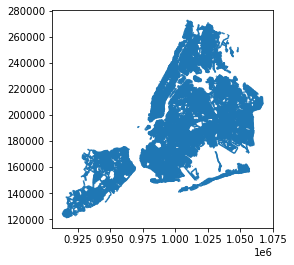

In [15]:
streets.plot()

In [16]:
streets.geom_type.value_counts()

MultiLineString    99468
dtype: int64

In [17]:
# clipping the streets that only fall within the boro shapes
streets_clipped = gpd.clip(streets, boros)

In [18]:
streets_clipped.geom_type.value_counts()

LineString            99373
MultiLineString          42
GeometryCollection       41
Point                     6
dtype: int64

In [19]:
streets_clipped = streets_clipped.loc[streets_clipped.geom_type == 'LineString']

In [20]:
streets_clipped.geom_type.value_counts()

LineString    99373
dtype: int64

In [21]:
# printing the columns of our dataframe
streets_clipped.columns

Index(['rw_type', 'l_low_hn', 'pre_direct', 'st_width', 'r_zip', 'r_low_hn',
       'bike_lane', 'post_type', 'r_blkfc_id', 'bike_trafd', 'frm_lvl_co',
       'post_modif', 'pre_type', 'full_stree', 'l_blkfc_id', 'shape_leng',
       'to_lvl_co', 'modified', 'status', 'post_direc', 'r_high_hn', 'l_zip',
       'snow_pri', 'borocode', 'trafdir', 'pre_modifi', 'st_label',
       'physicalid', 'st_name', 'created', 'l_high_hn', 'geometry',
       'rw_type_name'],
      dtype='object')

In [22]:
streets_clipped.iloc[:, 15:].head()

,shape_leng,to_lvl_co,modified,status,post_direc,r_high_hn,l_zip,snow_pri,borocode,trafdir,pre_modifi,st_label,physicalid,st_name,created,l_high_hn,geometry,rw_type_name
1,258.859740425,13,2020-08-28T00:00:00,2,None,215-026,11360,S,4,TW,None,28 AVE,6110,28,2007-11-29T00:00:00,215-027,"LINESTRING (1047146.080 222733.432, 1047385.93...",Street
2,454.932921708,13,2020-08-28T00:00:00,2,None,5698,10471,H,2,TW,None,ARLINGTON AVE,61140,ARLINGTON,2007-11-29T00:00:00,5699,"LINESTRING (1009926.638 269075.549, 1010033.71...",Street
3,609.424374552,13,2019-04-15T00:00:00,2,None,360,11217,C,3,TW,None,SCHERMERHORN ST,145494,SCHERMERHORN,2007-11-29T00:00:00,399,"LINESTRING (989292.818 189689.736, 989648.842 ...",Street
4,47.3992280891,13,2019-04-15T00:00:00,2,None,0,11415,C,4,TF,None,QUEENS BLVD,12438,QUEENS,2007-11-29T00:00:00,120-011,"LINESTRING (1031371.427 199453.863, 1031412.58...",Street
5,268.22875069,13,2019-04-15T00:00:00,2,None,555,10308,C,5,TW,None,ARTHUR KILL RD,15432,ARTHUR KIL,2007-11-29T00:00:00,554,"LINESTRING (940277.458 144141.538, 940027.193 ...",Street


In [23]:
streets_clipped = streets_clipped[['physicalid', 
                                   'st_label',
                                   'st_name',
                                   'full_stree',
                                   'rw_type', 
                                   'rw_type_name',  
                                   'st_width',
                                   'frm_lvl_co', 
                                   'to_lvl_co', 
                                   'borocode', 
                                   'shape_leng',
                                   'geometry']]

In [24]:
streets_clipped.head()

,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
1,6110,28 AVE,28,28 AVE,1,Street,35,13,13,4,258.859740425,"LINESTRING (1047146.080 222733.432, 1047385.93..."
2,61140,ARLINGTON AVE,ARLINGTON,ARLINGTON AVE,1,Street,42,13,13,2,454.932921708,"LINESTRING (1009926.638 269075.549, 1010033.71..."
3,145494,SCHERMERHORN ST,SCHERMERHORN,SCHERMERHORN ST,1,Street,50,13,13,3,609.424374552,"LINESTRING (989292.818 189689.736, 989648.842 ..."
4,12438,QUEENS BLVD,QUEENS,QUEENS BLVD,1,Street,40,13,13,4,47.3992280891,"LINESTRING (1031371.427 199453.863, 1031412.58..."
5,15432,ARTHUR KILL RD,ARTHUR KIL,ARTHUR KIL RD,1,Street,36,13,13,5,268.22875069,"LINESTRING (940277.458 144141.538, 940027.193 ..."


In [30]:
streets_clipped['shape_leng'] = streets_clipped.length

In [32]:
streets_clipped[['shape_leng']].head()

,shape_leng
1,258.859740
2,454.932922
3,609.424375
4,47.399228
5,268.228751


In [45]:
streets_clipped[['shape_leng']].describe()

,shape_leng
count,9.937300e+04
mean,3.430782e+02
std,2.619601e+02
min,1.068681e-08
25%,1.953033e+02
50%,2.648316e+02
75%,4.583296e+02
max,1.509366e+04


array([[<AxesSubplot:title={'center':'shape_leng'}>]], dtype=object)

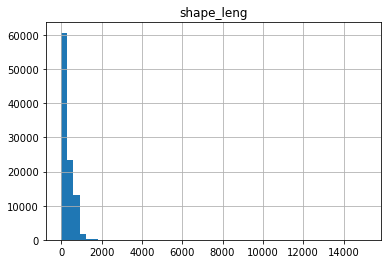

In [46]:
streets_clipped[['shape_leng']].hist(bins=50)

<AxesSubplot:>

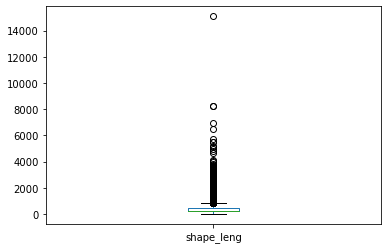

In [47]:
streets_clipped[['shape_leng']].plot.box()

In [48]:
streets_clipped.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 99373 entries, 1 to 120036
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   physicalid    99373 non-null  object  
 1   st_label      99373 non-null  object  
 2   st_name       99373 non-null  object  
 3   full_stree    99373 non-null  object  
 4   rw_type       99373 non-null  object  
 5   rw_type_name  99373 non-null  object  
 6   st_width      99373 non-null  object  
 7   frm_lvl_co    99373 non-null  object  
 8   to_lvl_co     99373 non-null  object  
 9   borocode      99373 non-null  object  
 10  shape_leng    99373 non-null  float64 
 11  geometry      99373 non-null  geometry
dtypes: float64(1), geometry(1), object(10)
memory usage: 9.9+ MB


In [49]:
streets_clipped.shape

(99373, 12)

In [50]:
streets_clipped.to_file("../data-raw/raw_streets_clipped.json", driver="GeoJSON")

In [51]:
path = '../data-raw/raw_streets_clipped.json'
streets = gpd.read_file(path)

print(streets.shape)
streets.head()

(99373, 12)


,physicalid,st_label,st_name,full_stree,rw_type,rw_type_name,st_width,frm_lvl_co,to_lvl_co,borocode,shape_leng,geometry
0,6110,28 AVE,28,28 AVE,1,Street,35,13,13,4,258.859740,"LINESTRING (1047146.080 222733.432, 1047385.93..."
1,61140,ARLINGTON AVE,ARLINGTON,ARLINGTON AVE,1,Street,42,13,13,2,454.932922,"LINESTRING (1009926.638 269075.549, 1010033.71..."
2,145494,SCHERMERHORN ST,SCHERMERHORN,SCHERMERHORN ST,1,Street,50,13,13,3,609.424375,"LINESTRING (989292.818 189689.736, 989648.842 ..."
3,12438,QUEENS BLVD,QUEENS,QUEENS BLVD,1,Street,40,13,13,4,47.399228,"LINESTRING (1031371.427 199453.863, 1031412.58..."
4,15432,ARTHUR KILL RD,ARTHUR KIL,ARTHUR KIL RD,1,Street,36,13,13,5,268.228751,"LINESTRING (940277.458 144141.538, 940027.193 ..."
